# TP4 - Ondes, relation de dispersion

## ARGUELLO Camilo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
from IPython.display import display, Math

# Phase d'une onde

In [3]:
# Constants
v_0 = 40 # KHz

In [4]:
# distances
x = np.array([1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]) # cm
dt = np.array([1.6, 4, 7.6, 10.4, 13.2, 16, 18.4]) # \mu s
T = 25 * np.ones(len(x)) # ms
phi = 2 * np.pi * (dt / T)

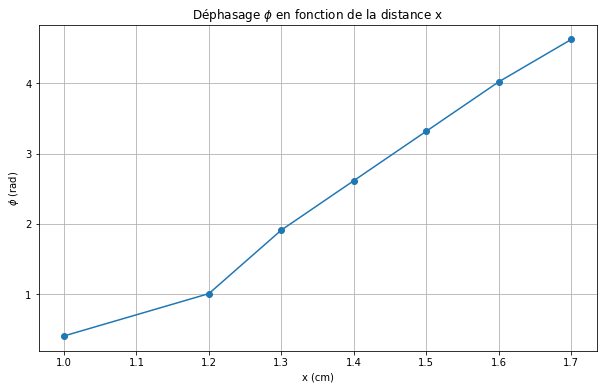

In [5]:
# phi en función de x
plt.figure(figsize=(10, 6)) 
plt.plot(x, phi, 'o-')
plt.xlabel('x (cm)')
plt.ylabel('$\\phi$ (rad)')
plt.title('Déphasage $\\phi$ en fonction de la distance x')
plt.grid()
plt.show()

Optimization terminated successfully.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

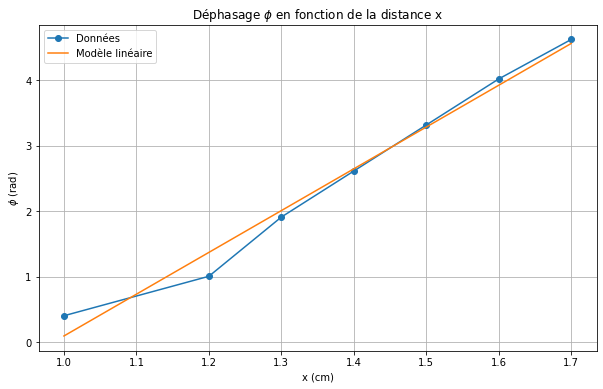

In [6]:
# ajuste lineal pour \phi = -kx + \phi_0

def f(x, k, phi0):
    return k * x + phi0
  
def chi2(params):
    k, phi0 = params
    return np.sum((f(x, k, phi0) - phi)**2)
  
res = minimize(chi2, [8, 0])
print(res.message)
k, phi0 = res.x

# affichage des résultats
display(Math('k = %.2f \; cm^{-1}' % k))
display(Math('\\phi_0 = %.2f \; rad' % phi0))

# longueur d'onde = (x1 - x2)
lamb = 2 * np.pi / k # cm
display(Math('\\lambda = %.2f \; cm' % lamb))

# affichage du fit
plt.figure(figsize=(10, 6)) 
plt.plot(x, phi, 'o-', label='Données')
plt.plot(x, f(x, k, phi0), label='Modèle linéaire')
plt.xlabel('x (cm)')
plt.ylabel('$\\phi$ (rad)')
plt.title('Déphasage $\\phi$ en fonction de la distance x')
plt.legend()
plt.grid()
plt.show()

### Relation de dispersion

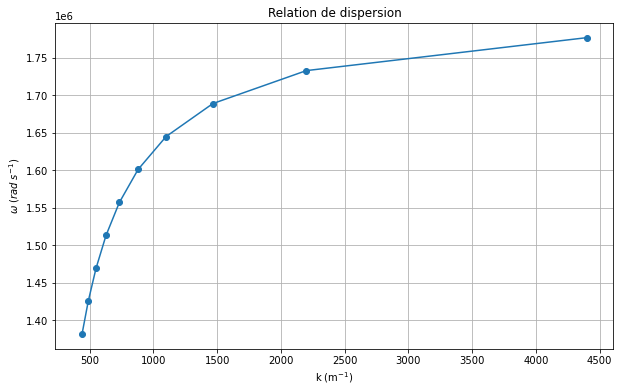

In [7]:
# mesures

# fréquences réparties sur un intervalle +- 5 KHz
v = np.linspace(v_0 - 5, v_0 + 5, 10) # KHz
d = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]) # cm
N = 7 * np.ones(len(d)) # nombre des fois que les signaux sont en phase
lam = d / N # cm

k = 2 * np.pi / lam # cm^-1
k_m = k * 100 # m^-1
w = 2 * np.pi * v # KHz
w_Hz = w * 1e3 # Hz
w_rad_s = w_Hz * 2 * np.pi # rad/s

delta_k = 0.1 # cm^-1
delta_k_m = delta_k * 100 # m^-1

plt.figure(figsize=(10, 6)) 
plt.errorbar(k_m, w_rad_s, xerr=delta_k_m, fmt='o-')
plt.xlabel('k (m$^{-1}$)')
plt.ylabel('$\\omega$ ($rad \; s^{-1}$)')
plt.title('Relation de dispersion')
plt.grid()
plt.show()

In [8]:
# Valeur c à partir du graphe
# Vitesse c = w / k
c_test = w_Hz / k_m # m/s
display(Math('c = %.2f \; m \; s^{-1}' % np.mean(c_test)))

<IPython.core.display.Math object>

In [9]:
# Valeur c avec ajustement
# Courbe fit w = c k

def f(x, c):
    return c * x

def chi2(params):
    c = params[0]
    return np.sum((f(k_m, c) - w_Hz)**2)
  
# minimise
res = minimize(chi2, [1])
print(res.message)
c = res.x[0]
display(Math('c = %.2f \; m \; s^{-1}' % c))

Optimization terminated successfully.


<IPython.core.display.Math object>

### B.4 Mesure de la relation de dispersion

In [10]:
# 15 Pulsation

# fréquence
v = 15 # Hz
delta_v = 0.1 # Hz

# Distance pour (5) franges
d = 12.5 # cm

# Calibration du système
l_B = 12 # cm
l_B_ecran = 22 # cm
G = l_B_ecran / l_B # cm

# Longueur d'onde
lam = d / 5 / G # cm
delta_lam = ( 0.1 / 5) # cm

# Nombre d'onde
k = 2 * np.pi / lam # cm^-1
delta_k = k * np.sqrt((delta_lam / lam)**2)

# Vitesse
c = v * lam # cm/s
delta_c = c * np.sqrt((delta_lam / lam)**2)

# Pulsation
w = k / 100 * c / 100 # rad/s 
delta_w = w * np.sqrt((delta_k / k)**2 + (delta_c / c)**2)

display(Math('\\lambda = %.2f \; \pm %.3f \; cm \;' % (lam, delta_lam)))
display(Math('k = %.2f \; \pm %.3f \; cm^{-1} \;' % (k, delta_k)))
display(Math('c = %.2f \; \pm %.3f \; cm \; s^{-1} \;' % (c, delta_c)))
display(Math('\\omega = %.3e \; \pm %.2e \; rad \; s^{-1}' % (w, delta_w)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
def get_data_from_frequencies (v, lam, delta_lam, delta_v):
  # vitesse
  c = lam * v # cm s^-1
  delta_c = v * np.sqrt((delta_lam / lam)**2 + (delta_v / v)**2)

  # nombre d'onde
  k = 2 * np.pi / lam # cm^-1
  delta_k = 2 * np.pi * delta_lam / lam**2 # cm^-1

  # pulsation
  w = k / 100 * c / 100 # rad s^-1
  delta_w = np.sqrt((delta_k / k)**2 + (delta_c / c)**2) * w
  
  return c, delta_c, k, delta_k, w, delta_w

def create_dataframe (v, lam, k, w, c, delta_v, delta_lam, delta_k, delta_w, delta_c):
  data = {
    'v (Hz)': v,
    'lambda (cm)': lam,
    'k (cm^-1)': k,
    'w (rad s^-1)': w,
    'c (cm s^-1)': c,
    'delta v (Hz)': delta_v,
    'delta lambda (cm)': delta_lam,
    'delta k (cm^-1)': delta_k,
    'delta w (rad s^-1)': delta_w,
    'delta c (cm s^-1)': delta_c
  }
  return pd.DataFrame(data)

,v (Hz),lambda (cm),k (cm^-1),w (rad s^-1),c (cm s^-1),delta v (Hz),delta lambda (cm),delta k (cm^-1),delta w (rad s^-1),delta c (cm s^-1)
0,15.0,1.25,5.026548,0.009425,18.75,0.1,0.02,0.080425,0.000200,0.260000
1,20.0,0.96,6.544985,0.012566,19.20,0.1,0.02,0.136354,0.000384,0.428499
2,25.0,0.66,9.519978,0.015708,16.50,0.1,0.02,0.288484,0.000869,0.764147
3,30.0,0.55,11.423973,0.018850,16.50,0.1,0.02,0.415417,0.001427,1.095483
4,35.0,0.61,10.300304,0.021991,21.35,0.1,0.02,0.337715,0.001388,1.151890
5,40.0,0.54,11.635528,0.025133,21.60,0.1,0.02,0.430945,0.001963,1.484853
6,45.0,0.49,12.822827,0.028274,22.05,0.1,0.02,0.523381,0.002626,1.839455
7,50.0,0.37,16.981582,0.031416,18.50,0.1,0.02,0.917923,0.004897,2.704552


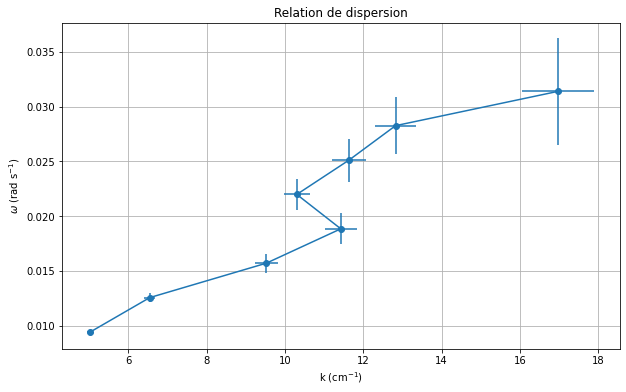

In [12]:
# 16 - 17

# Frequences allant de 15 à 50 Hz par pas de 5 Hz
v = np.linspace(15, 50, 8) # Hz
delta_v = 0.1 # Hz

# longueurs d'onde
lam = np.array([ 1.25, 0.96, 0.66, 0.55, 0.61, 0.54, 0.49, 0.37 ]) # cm
delta_lam = (0.1 / 5) # cm

c, delta_c, k, delta_k, w, delta_w = get_data_from_frequencies(v, lam, delta_lam, delta_v)
df_15_50 = create_dataframe(v, lam, k, w, c, delta_v, delta_lam, delta_k, delta_w, delta_c)
display(df_15_50)

plt.figure(figsize=(10, 6)) 
plt.errorbar(k, w, xerr=delta_k, yerr=delta_w, fmt='o-')
plt.xlabel('k (cm$^{-1}$)')
plt.ylabel('$\\omega$ (rad s$^{-1}$)')
plt.title('Relation de dispersion')
plt.grid()
plt.show()

# Frequences allant de 15 à 3 Hz par pas de 2 Hz
v = np.linspace(15, 3, 8) # Hz
delta_v = 0.1 # Hz

# longueurs d'onde
lam = np.array([ 1.25, 0.96, 0.66, 0.55, 0.61, 0.54, 0.49, 0.37 ]) * 3.5 # cm
delta_lam = (0.1 / 5) # cm

#c, delta_c, k, delta_k, w, delta_w = get_data_from_frequencies(v, lam, delta_lam, delta_v)
#df_15_03 = create_dataframe(v, lam, k, w, c, delta_v, delta_lam, delta_k, delta_w, delta_c)

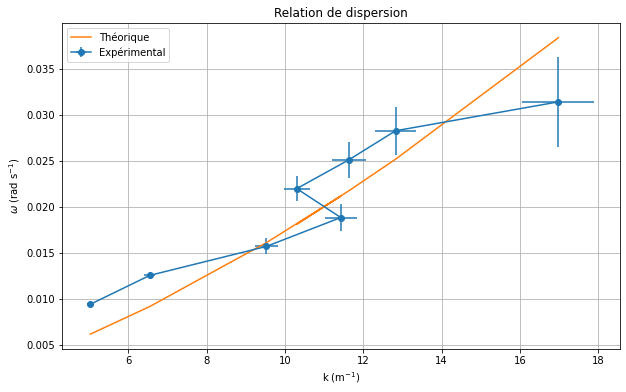

In [13]:
# 18 - 19
h = (4 / 1000) # m
# gravité
g = 9.81 # m s^-2
# masse volumique de l'eau
rho = 997 # kg m^-3
# tension de surface de l'eau (ajustée à la main)
gamma = 30e-5 # N m^-1
# longueur capillaire
l_c = np.sqrt(gamma / (rho * g)) # m

# w(k) théorique
def w_k(k):
  return l_c * np.sqrt(g) * k * np.sqrt(k)

plt.figure(figsize=(10, 6)) 
plt.errorbar(k, w, xerr=delta_k, yerr=delta_w, fmt='o-', label='Expérimental')
plt.plot(k, w_k(k), label='Théorique')
plt.xlabel('k (m$^{-1}$)')
plt.ylabel('$\\omega$ (rad s$^{-1}$)')
plt.title('Relation de dispersion')
plt.grid()
plt.legend()
plt.show()

In [17]:
# 20

# k limites
k_1 = 1 / l_c
k_2 = 1 / h

display(Math('k_1 = %.2e \; m^{-1}' % k_1))
display(Math('k_2 = %.2e \; m^{-1}' % k_2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

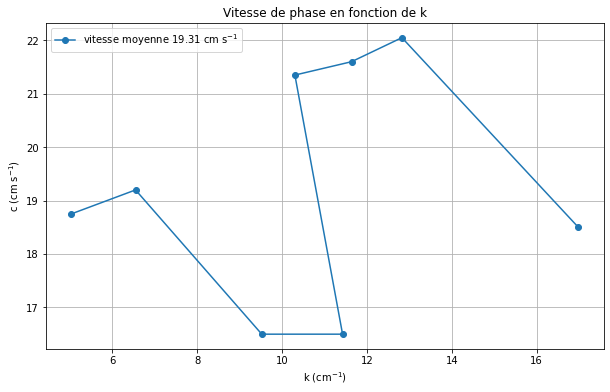

In [15]:
# 21 - 22

c_moy = c.mean()

plt.figure(figsize=(10, 6)) 
plt.plot(k, c, 'o-', label='vitesse moyenne ' + str(round(c_moy,2)) + ' cm s$^{-1}$')
plt.xlabel('k (cm$^{-1}$)')
plt.ylabel('c (cm s$^{-1}$)')
plt.title('Vitesse de phase en fonction de k')
plt.grid()
plt.legend()
plt.show()
